In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
df = pd.read_csv("patient_dataset.csv")
df

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,Urban,Smoker
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,Urban,Unknown
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,Rural,Non-Smoker
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,Rural,Smoker
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,Rural,Smoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,76,1.0,1,117,247,88,1,104.0,22.0,179.0,42.427361,2.017600,1,0,Rural,Non-Smoker
5996,51,1.0,2,173,297,81,0,208.0,74.0,82.0,24.093549,1.276717,0,1,Urban,Non-Smoker
5997,70,0.0,2,120,234,111,0,139.0,45.0,86.0,40.483956,0.646022,0,1,Urban,Non-Smoker
5998,78,0.0,2,131,189,133,1,196.0,83.0,150.0,24.987071,0.719095,1,0,Urban,Non-Smoker


PREPROCESSING

In [9]:
df.shape

(6000, 16)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6000 non-null   int64  
 1   gender             5528 non-null   float64
 2   chest_pain_type    6000 non-null   int64  
 3   blood_pressure     6000 non-null   int64  
 4   cholesterol        6000 non-null   int64  
 5   max_heart_rate     6000 non-null   int64  
 6   exercise_angina    6000 non-null   int64  
 7   plasma_glucose     5391 non-null   float64
 8   skin_thickness     5386 non-null   float64
 9   insulin            5432 non-null   float64
 10  bmi                6000 non-null   float64
 11  diabetes_pedigree  6000 non-null   float64
 12  hypertension       6000 non-null   int64  
 13  heart_disease      6000 non-null   int64  
 14  residence_type     5545 non-null   object 
 15  smoking_status     6000 non-null   object 
dtypes: float64(6), int64(8),

In [11]:
df.describe()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
count,6000.000000,5528.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,5391.000000,5386.000000,5432.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,53.657833,0.497648,2.518500,134.277167,209.844667,144.996000,0.503167,161.119644,59.964723,129.601252,29.941495,1.294623,0.501333,0.498167
std,21.018382,0.500040,1.124071,48.303001,52.840432,43.583318,0.500032,52.434693,23.264030,29.207479,11.626425,0.689932,0.500040,0.500038
min,18.000000,0.000000,1.000000,0.000000,120.000000,70.000000,0.000000,70.000000,20.000000,80.000000,10.006670,0.100068,0.000000,0.000000
25%,36.000000,0.000000,2.000000,109.000000,164.000000,108.000000,0.000000,116.000000,40.000000,105.000000,19.797401,0.690522,0.000000,0.000000
50%,53.000000,0.000000,3.000000,135.000000,210.000000,144.000000,1.000000,162.000000,60.000000,129.000000,29.940303,1.294057,1.000000,0.000000
75%,72.000000,1.000000,4.000000,161.000000,257.000000,183.000000,1.000000,206.000000,80.000000,155.000000,39.859571,1.899079,1.000000,1.000000
max,90.000000,1.000000,4.000000,300.000000,300.000000,220.000000,1.000000,250.000000,100.000000,180.000000,49.999449,2.499635,1.000000,1.000000


In [12]:
df.isnull().sum()

age                    0
gender               472
chest_pain_type        0
blood_pressure         0
cholesterol            0
max_heart_rate         0
exercise_angina        0
plasma_glucose       609
skin_thickness       614
insulin              568
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
residence_type       455
smoking_status         0
dtype: int64

In [15]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(exclude=[np.number]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
df.isnull().sum()

age                  0
gender               0
chest_pain_type      0
blood_pressure       0
cholesterol          0
max_heart_rate       0
exercise_angina      0
plasma_glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
residence_type       0
smoking_status       0
dtype: int64

In [ ]:
features = [
    "age","gender","chest_pain_type","blood_pressure","cholesterol",
    "max_heart_rate","exercise_angina","plasma_glucose","skin_thickness",
    "insulin","bmi","diabetes_pedigree","hypertension","heart_disease",
    "residence_type","smoking_status"
]

X = df[features]

X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

VISUALIZATION

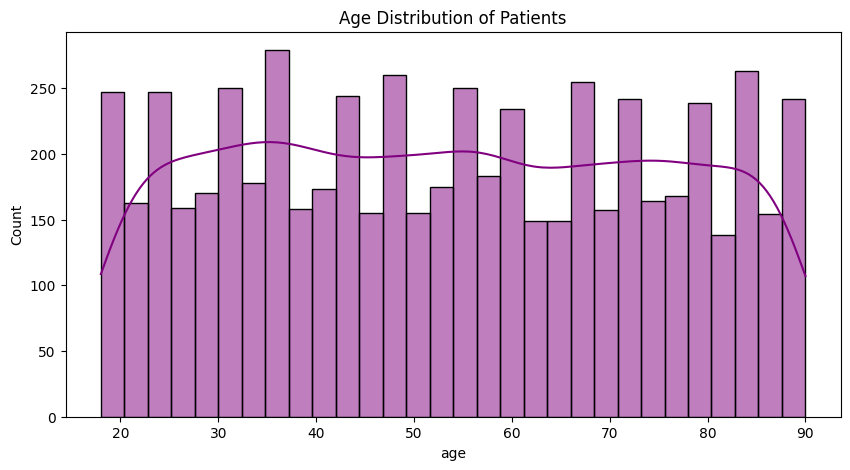

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(df["age"], bins=30, kde=True,color='purple')
plt.title("Age Distribution of Patients")
plt.show()

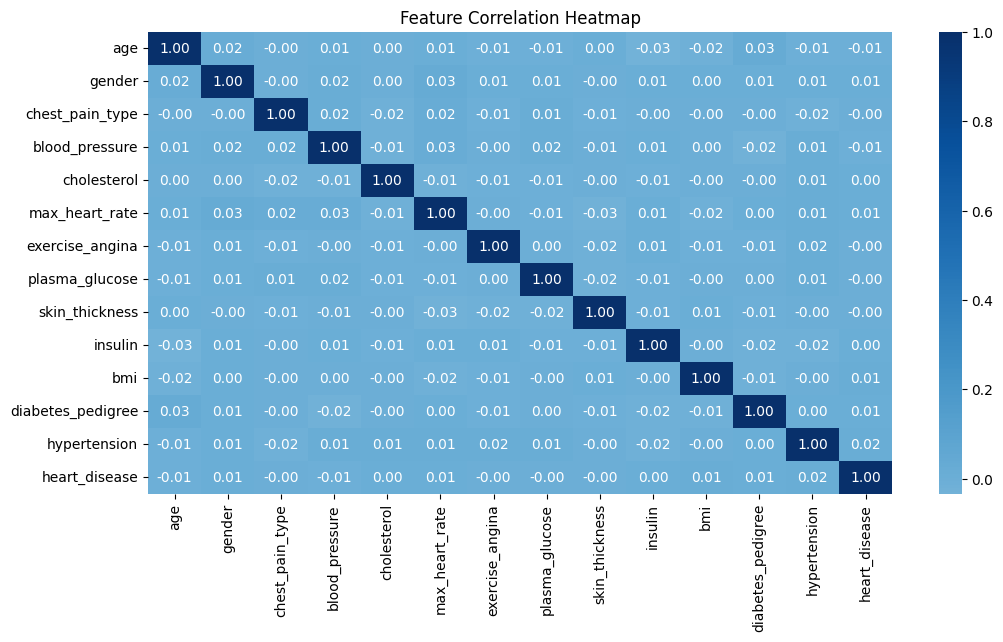

In [46]:
plt.figure(figsize=(12,6))

numeric_df = df.select_dtypes(include=[np.number])

sns.heatmap(numeric_df.corr(), cmap="Blues", center=0, annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

CLUSTERING

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

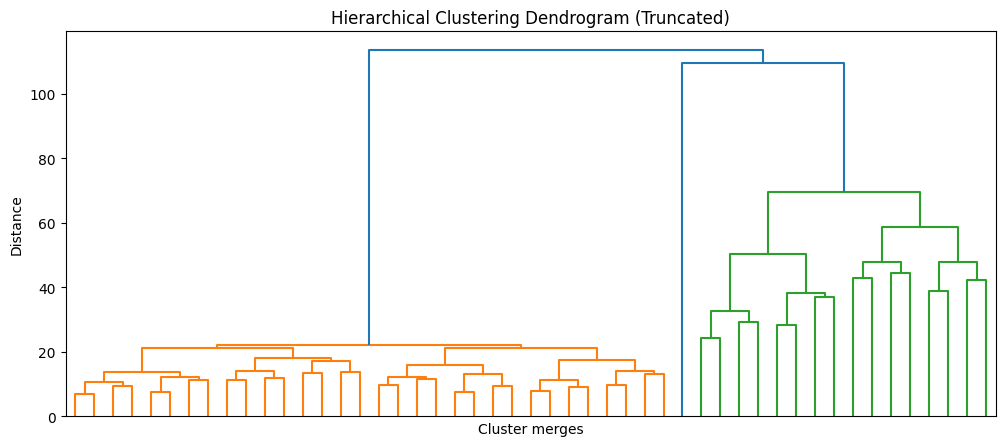

In [48]:
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 5))
dendrogram(
    Z,
    truncate_mode='level',
    p=5,
    no_labels=True
)
plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Cluster merges")
plt.ylabel("Distance")
plt.show()

In [27]:
dbscan = DBSCAN(eps=2, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [55]:
def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    if len(unique_clusters) < 2:
        return -1
    inter_dists = []
    intra_dists = []
    for i in unique_clusters:
        Xi = X[labels == i]
        intra_dists.append(np.max(np.linalg.norm(Xi[:, None] - Xi, axis=2)))
        for j in unique_clusters:
            if i < j:
                Xj = X[labels == j]
                inter_dists.append(np.min(np.linalg.norm(Xi[:, None] - Xj, axis=2)))
    return np.min(inter_dists) / np.max(intra_dists)

def elbow_method(X, max_k=10):
    inertias = []
    for k in range(2, max_k+1):
        km = KMeans(n_clusters=k, random_state=42).fit(X)
        inertias.append(km.inertia_)
    return inertias

results = {}
for name, labels in [("KMeans", kmeans_labels),
                     ("Hierarchical", hier_labels),
                     ("DBSCAN", dbscan_labels)]:
    if len(set(labels)) > 1:
        sil = silhouette_score(X_scaled, labels)
        ch = calinski_harabasz_score(X_scaled, labels)
        db = davies_bouldin_score(X_scaled, labels)
        dunn = dunn_index(X_scaled, labels)
        if "target" in df.columns:
            ri = rand_score(df["target"], labels)
        else:
            ri = -1
        if name == "KMeans":
            elbow = elbow_method(X_scaled, max_k=8)
        else:
            elbow = -1
    else:
        sil, ch, db, dunn, ri, elbow = -1, -1, -1, -1, -1, -1
    results[name] = {
        "Silhouette": sil,
        "Calinski-Harabasz": ch,
        "Davies-Bouldin": db,
        "RI": ri,
        "Dunn Index": dunn,
        "Elbow Model": elbow
    }


df_results = pd.DataFrame(results).T

best_method = df_results["Silhouette"].idxmax()
print("Best clustering method based on Silhouette Score:", best_method)

display(df_results)

Best clustering method based on Silhouette Score: Hierarchical


,Silhouette,Calinski-Harabasz,Davies-Bouldin,RI,Dunn Index,Elbow Model
KMeans,0.07136,374.864184,3.218522,-1,0.027772,"[101543.67055506505, 95998.52916211623, 93745...."
Hierarchical,0.168851,391.621526,1.373171,-1.0,0.371566,-1.0
DBSCAN,-1,-1,-1,-1,-1,-1


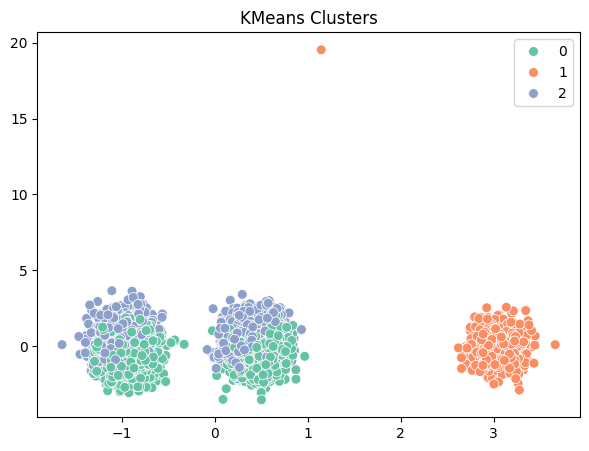

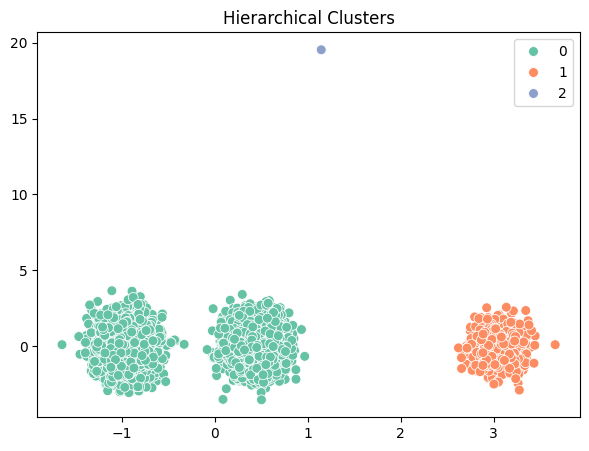

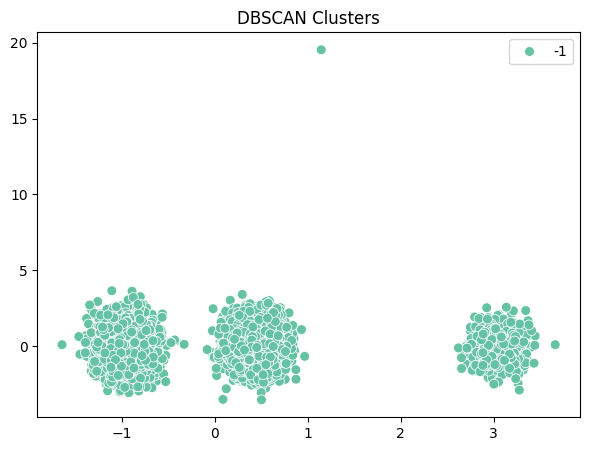

In [56]:
def plot_clusters(X, labels, title):
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, palette="Set2", s=50)
    plt.title(title)
    plt.show()

plot_clusters(X_pca, kmeans_labels, "KMeans Clusters")
plot_clusters(X_pca, hier_labels, "Hierarchical Clusters")
plot_clusters(X_pca, dbscan_labels, "DBSCAN Clusters")

DEPLOYMENT

In [57]:
import joblib

with open("patient.pkl", "wb") as f:
    joblib.dump(scaler, f)